# Classification ALgorithm - KNN 

In [2]:
#import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns


### Load data from csv

In [4]:

data = pd.read_csv("./Sloan Digital Sky Servey.csv")

In [5]:
#Contents Of Data

data.head()


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [6]:
#Attributes in data

data.keys()

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

# Data Preprocessing

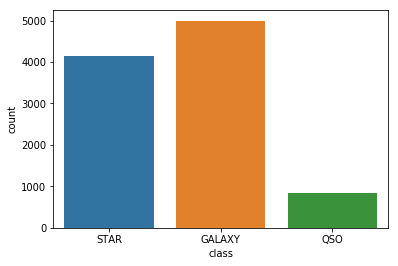

In [7]:
#classes in the target

sns.countplot(x='class',data=data)


In [8]:
#convert text class to numeric

d = []
for i in range(len(data)):
   
    if data['class'][i] == "STAR":
        
        d.append(0)
    if data['class'][i] == "GALAXY":
        
        d.append(1)
    if data['class'][i] == "QSO":
        
        d.append(2)


In [9]:
#Add processed target to  Y variable

Y = pd.DataFrame(d,  columns = ['target'])

In [10]:
#drop text target in X
X = data.drop(columns = ["class"])

In [11]:
#concatinate both

df = pd.concat([X, Y], axis=1)

In [12]:
# keys in df
df.keys()

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid', 'target'],
      dtype='object')

### correlation for features selection

In [13]:

correlation = df.corr('pearson')
abs(correlation['target']).sort_values()

objid        1.442555e-15
field        2.610148e-03
camcol       1.026907e-02
fiberid      1.266851e-02
ra           4.118918e-02
dec          9.124866e-02
run          1.006273e-01
z            1.494443e-01
i            2.053670e-01
r            2.786783e-01
u            2.845415e-01
g            3.573522e-01
specobjid    4.660012e-01
plate        4.660039e-01
mjd          5.278030e-01
redshift     6.210460e-01
target       1.000000e+00
rerun                 NaN
Name: target, dtype: float64

### Normalize X

In [14]:

X = (X-X.min()) / (X.max()-X.min())

### Split X and Y as train and test

In [18]:
xtrain, xtestx, ytrain, ytesty = train_test_split(X,Y, test_size=0.3)


In [19]:
f1 = 'redshift'
f2 = 'mjd'
f3 = 'plate'
f4 = "ra"
f5 = "dec"
f6 = "u"
f7 = "g"
f8 = "r"
f9 = "i"
f10 = "z"

#features used to implement algorithm
basex = np.array(xtrain[[f1,f2,f3,]])
basey = np.array(ytrain['target'])
xtest = np.array(xtestx[[f1,f2,f3]])
ytest = np.array(ytesty['target'])

In [20]:
k= np.sqrt(len(X))
k

100.0

# KNN Algorithm - Hard Code

In [21]:
# Calculate Distance between any two given points

def euclid_distance(train_point, given_point):
    distance = np.sum((train_point-given_point)**2)
    return np.sqrt(distance)

In [22]:
# Calculate distance from a given point to all other points
# and keep track of the respective classes for those distances
# and eventually return sorted list of distances

def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda tup: tup[0])
    return all_distances

In [23]:
# Get the "n" defined neighbours from a list of sorted distances

def get_neighbours(distances, count):
    return distances[:count]

In [24]:
# Takes a given point and predicts the class based on all other points

def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances, 5)
    
    op = [row[-1] for row in neighbours]
    prediction = max(set(op), key=op.count)
    return prediction

In [25]:

# for which we already know the right answer to

def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [26]:
print(accuracy(basex,basey,xtest,ytest))

Accuracy: 97.6%


#   

# KNN - Using Sklearn

In [244]:
#import knn algorithm from sklearn

from sklearn.neighbors import KNeighborsClassifier

In [245]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) 

In [246]:
classifier.fit(basex,basey)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [247]:
ypred = classifier.predict(xtest)

### Accuracy Scores  

In [248]:
# for 'redshift' 'mjd' 'plate' for k = 5 

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.9836666666666667


In [250]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1243
           1       0.99      0.98      0.98      1506
           2       0.98      0.92      0.95       251

   micro avg       0.98      0.98      0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [159]:
# for 'redshift' 'mjd' 'plate' - based on highest co-related values for k = 10

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.9743333333333334


In [164]:
# for 'redshift' 'mjd'  for k = 10
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.984


In [154]:
# for 'redshift' 'mjd' 'plate' 'ra' 'dec  for k = 10

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.9263333333333333


In [149]:
# for 'redshift' 'mjd' 'plate' 'ra' 'dec' 'u 'g'  for k = 10

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.904


In [144]:
# for 'redshift' 'mjd' 'plate' 'ra' 'dec' 'u 'g' 'r' 'i'  for k = 10

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.9196666666666666
